In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.ticker import MultipleLocator

%matplotlib inline

In [116]:
df= pd.read_csv('data.csv', header=4)
df.head()

,Year,Value
0,1880,-0.13
1,1881,-0.09
2,1882,-0.10
3,1883,-0.19
4,1884,-0.27


In [117]:
df.tail()

,Year,Value
136,2016,0.99
137,2017,0.91
138,2018,0.82
139,2019,0.94
140,2020,0.98


In [118]:
df = df.rename(columns={'Year':'year', 'Value': 'deg_diff_cel'})

In [119]:
df.year = df.year.astype(int)
df.year

0      1880
1      1881
2      1882
3      1883
4      1884
       ... 
136    2016
137    2017
138    2018
139    2019
140    2020
Name: year, Length: 141, dtype: int64

In [120]:
df['deg_diff_fah'] = df['deg_diff_cel'].apply(lambda x:(9 * x / 5 + 32) - 32)
df.head()

,year,deg_diff_cel,deg_diff_fah
0,1880,-0.13,-0.234
1,1881,-0.09,-0.162
2,1882,-0.10,-0.180
3,1883,-0.19,-0.342
4,1884,-0.27,-0.486


In [124]:
def format_func1(value, tick_number):
    number = "{:.2f}".format(value)
    return r"${0}^\circ$C".format(number)

def format_func2(value, tick_number):
    number = "{:.2f}".format(value)
    return r"${0}^\circ$F".format(number)
    

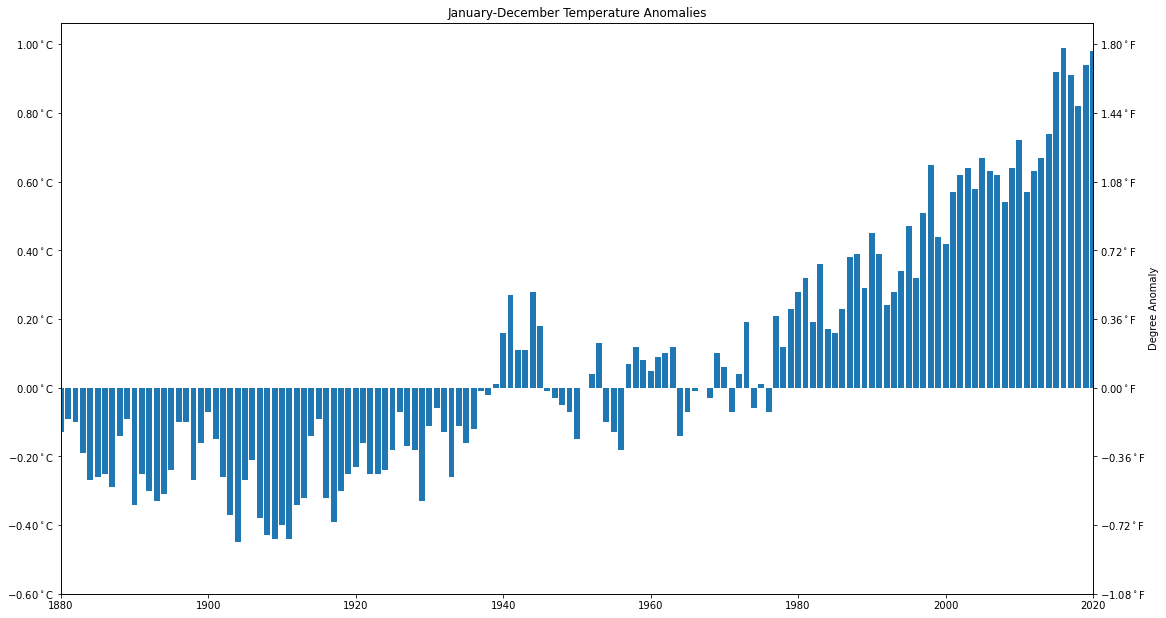

In [126]:
years = df.year
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5, forward=True)
ax.bar(years, df.deg_diff_cel)
ax.set_yticks([-.60, -.40, -.20, 0.0, .20, .40, .60, .80, 1.0])
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func1))
#ax.yaxis.set_major_locator(MultipleLocator(.2))

ax2=ax.twinx()
ax2.bar(years, df.deg_diff_fah)
ax2.set_yticks([-1.08, -.72, -.36, 0.0, .36, .72, 1.08, 1.44, 1.80])
ax2.yaxis.set_major_formatter(plt.FuncFormatter(format_func2))

plt.xticks(np.arange(years.min(), years.max() + 20 , 20))
plt.ylabel('Degree Anomaly')
plt.xlabel('Years')
plt.title('January-December Temperature Anomalies');
plt.xlim([1880, 2020]);



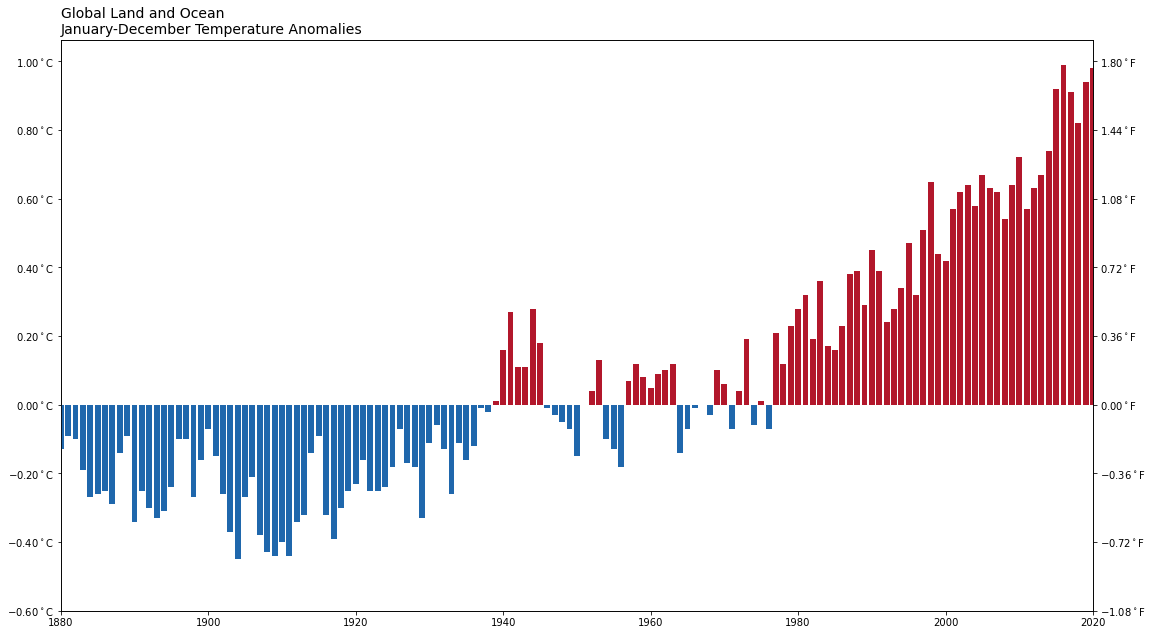

In [164]:
years = df.year
fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5, forward=True)
ax.bar(years, df.deg_diff_cel)
ax.set_yticks([-.60, -.40, -.20, 0.0, .20, .40, .60, .80, 1.0])
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_func1))
#ax.yaxis.set_major_locator(MultipleLocator(.2))

ax2=ax.twinx()
ax2.bar(years, df.deg_diff_fah, color=(df['deg_diff_fah'] > 0).map({True: '#b2172b',False: '#1f67ac'}))
ax2.set_yticks([-1.08, -.72, -.36, 0.0, .36, .72, 1.08, 1.44, 1.80])
ax2.yaxis.set_major_formatter(plt.FuncFormatter(format_func2))

                    
plt.xticks(np.arange(years.min(), years.max() + 20 , 20))
plt.title('Global Land and Ocean \nJanuary-December Temperature Anomalies', fontsize=14, loc='left')



plt.xlim([1880, 2020]);
